# Project P2: Auto Encoder
---

## Summary: 
### - Perform basic unsupervised learning tasks using keras
### - Apply unsupervised learning on PyRat datasets 

What is Autoencoder ?
--
An autoencoder is an artificial neural network used for unsupervised learning of efficient codings. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. Recently, the autoencoder concept has become more widely used for learning generative models of data. Some of the most powerful AI in the 2010s involves stacking sparse autoencoders in a deep learning network.

<a href="https://en.wikipedia.org/wiki/Autoencoder">Source Wikipedia</a>

https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798
    

Structure 
-- 
<img src="structure.png" alt="Structure"/>
<a href="https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798">Image Source</a>

An autoencoder always consists of two parts, the encoder and the decoder, which can be defined as transitions ${\displaystyle \phi }$  and  ${\displaystyle \psi ,}$  such that:

$${\displaystyle \phi :{\mathcal {X}}\rightarrow {\mathcal {F}}} (encoder)$$
$${\displaystyle \psi :{\mathcal {F}}\rightarrow {\mathcal {X}}} (decoder)$$ 
$${\displaystyle \phi ,\psi ={\underset {\phi ,\psi }{\operatorname {arg\,min} }}\,\|X-(\psi \circ \phi )X\|^{2}}$$ 
In the simplest case, where there is one hidden layer, the encoder stage of an autoencoder takes the input ${\displaystyle \mathbf {x} \in \mathbb {R} ^{d}={\mathcal {X}}}$  and maps it to ${\displaystyle \mathbf {z} \in \mathbb {R} ^{p}={\mathcal {F}}}$ :

${\displaystyle \mathbf {z} =\sigma (\mathbf {Wx} +\mathbf {b} )} $

This image ${\displaystyle \mathbf {z} }$  is usually referred to as code, latent variables, or latent representation. Here, ${\displaystyle \sigma }$  is an element-wise activation function such as a sigmoid function or a rectified linear unit. ${\displaystyle \mathbf {W} }$  is a weight matrix and ${\displaystyle \mathbf {b} }$  is a bias vector. After that, the decoder stage of the autoencoder maps ${\displaystyle \mathbf {z} }$  to the reconstruction ${\displaystyle \mathbf {x'} }$  of the same shape as ${\displaystyle \mathbf {x} }$ :

$${\displaystyle \mathbf {x'} =\sigma '(\mathbf {W'z} +\mathbf {b'} )} $$
where ${\displaystyle \mathbf {\sigma '} ,\mathbf {W'} ,{\text{ and }}\mathbf {b'} }$  for the decoder may differ in general from the corresponding ${\displaystyle \mathbf {\sigma } ,\mathbf {W} ,{\text{ and }}\mathbf {b} }$  for the encoder, depending on the design of the autoencoder.

Autoencoders are also trained to minimise reconstruction errors (such as squared errors):

$${\displaystyle {\mathcal {L}}(\mathbf {x} ,\mathbf {x'} )=\|\mathbf {x} -\mathbf {x'} \|^{2}=\|\mathbf {x} -\sigma '(\mathbf {W'} (\sigma (\mathbf {Wx} +\mathbf {b} ))+\mathbf {b'} )\|^{2}} $$
where ${\displaystyle \mathbf {x} }$  is usually averaged over some input training set.



Application on MNIST dataset :)
--
We'll use keras

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
import tqdm

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
#encoder
epochs = 3
batch_size = 128

history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, x_test))
#history=autoencoder.fit(x_train, x_train, epochs=5)


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 9s 146us/step - loss: 0.1845 - val_loss: 0.1234
Epoch 2/3
60000/60000 [==============================] - 8s 136us/step - loss: 0.1133 - val_loss: 0.1052
Epoch 3/3
60000/60000 [==============================] - 8s 133us/step - loss: 0.1032 - val_loss: 0.0989


In [6]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 11
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == int(n/2):
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == int(n/2):
            ax.set_title('Reconstructed Images')
    plt.show()


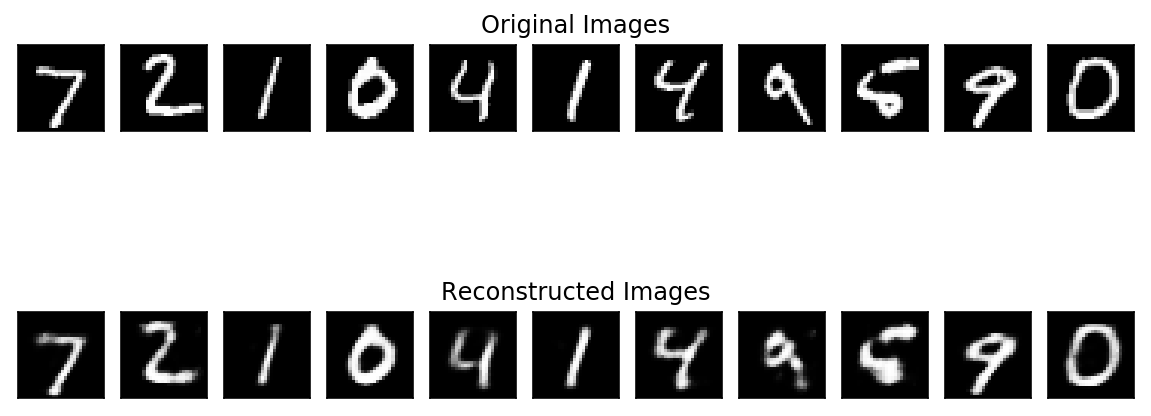

In [7]:
plot_autoencoder_outputs(autoencoder, 5, (28, 28))
#some examples

Now we calculate the error made by the autoencoder

dict_keys(['loss', 'val_loss'])


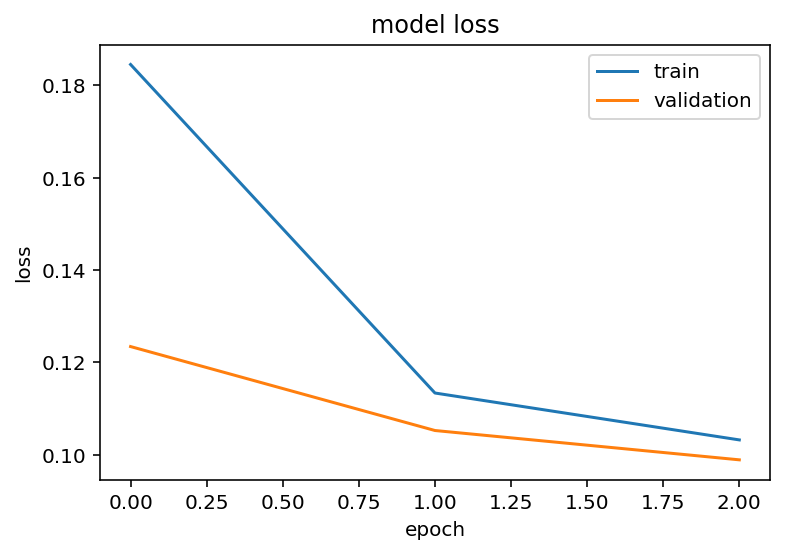

In [8]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Application on pyRat dataset !
We are going to be concentrating ourselves only in the games that the python lost (i.e y < 1)

In [10]:
### CELL TO COMPLETE, load the dataset and stock only the games the python lost in x and y
x = np.load('dataset.npz')['x']
y = np.load('dataset.npz')['y']

x = x[y<1]
y = y[y<1]

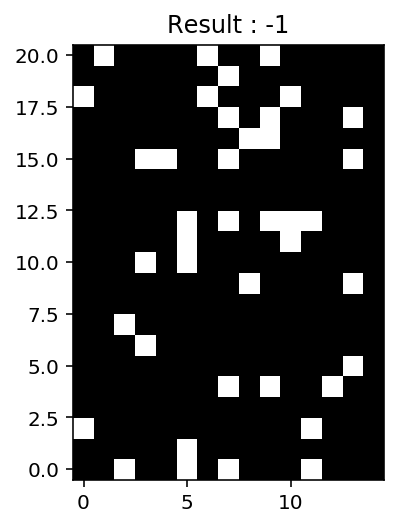

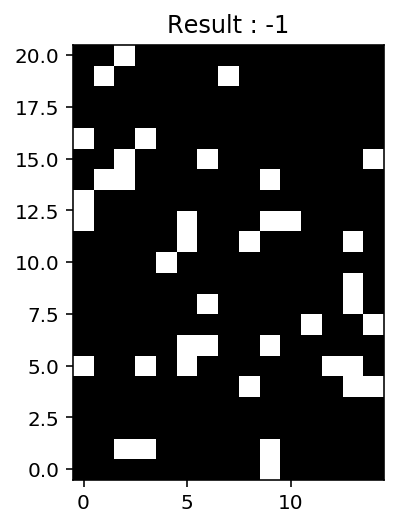

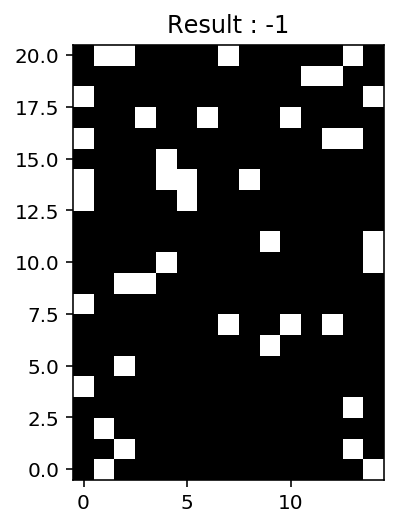

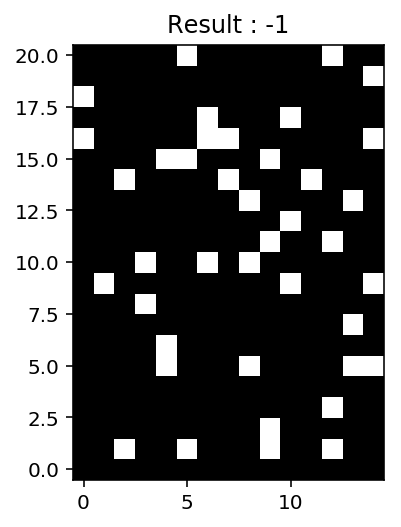

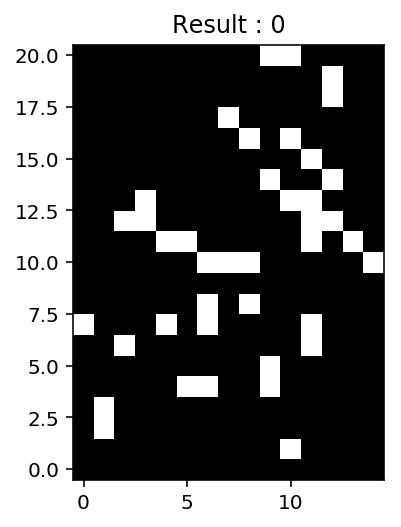

In [11]:
afew = 5
for i in range(afew):
    ind = np.random.randint(x.shape[0])
    plt.imshow(x[ind].reshape((21,15)))
    plt.title('Result : %d' % y[ind])
    plt.gca().invert_yaxis()
    plt.show()

## Mean representation of losses

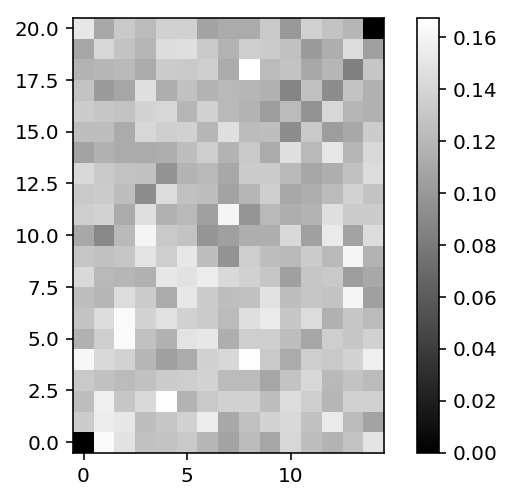

In [12]:
### CELL TO COMPLETE
mean_representation = np.mean(x,axis=0)
plt.imshow(mean_representation.reshape((21,15))) #We have to reshape the labyrinth
plt.gca().invert_yaxis() #We have to invert the axis so that our representation is the same as of pyrat.
plt.colorbar()

In [44]:
from keras.models import Sequential
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(315,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(315, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x, x, epochs=3, validation_data=(x, x))

Train on 561 samples, validate on 561 samples
Epoch 1/3
561/561 [==============================] - 1s 1ms/step - loss: 0.6292 - val_loss: 0.4545
Epoch 2/3
561/561 [==============================] - 0s 220us/step - loss: 0.4105 - val_loss: 0.3843
Epoch 3/3
561/561 [==============================] - 0s 223us/step - loss: 0.3832 - val_loss: 0.3808


original: 


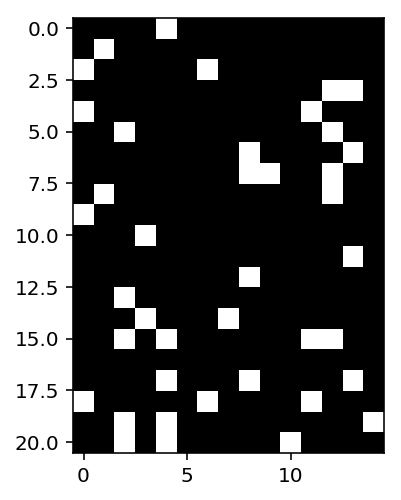

reconstructed: 


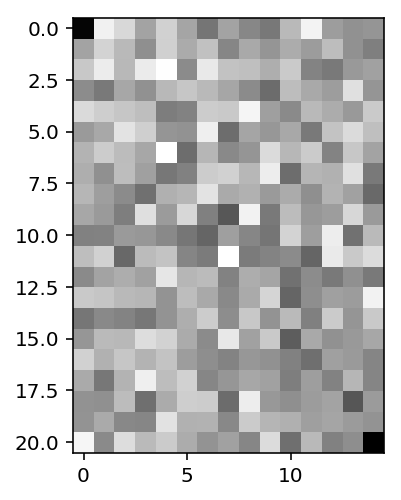

compressed: 


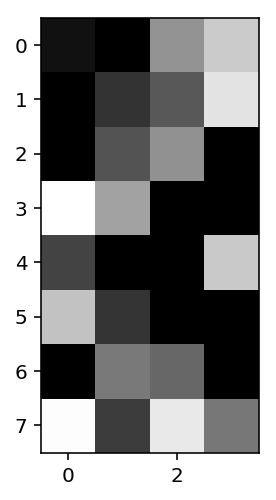

original: 


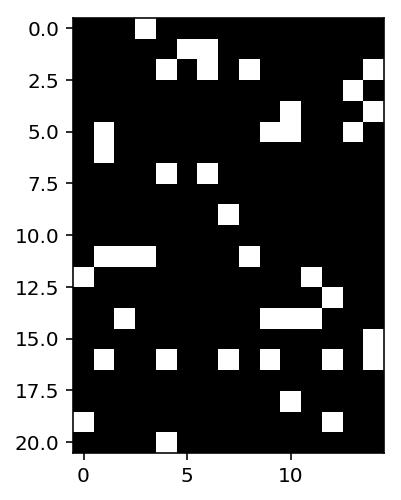

reconstructed: 


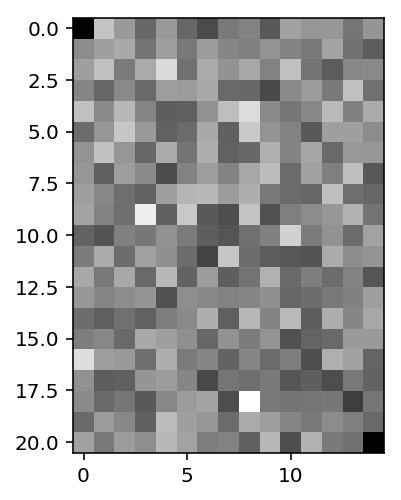

compressed: 


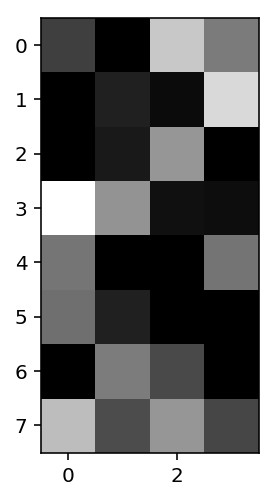

In [51]:
from keras import backend as K
def test_restoration(model):
    decoded_imgs = model.predict(x)
    get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
    
    for i in range(2):
        print("original: ")
        plt.imshow(x[i].reshape(21, 15))
        plt.show()
     #-------------------
        print("reconstructed: ")
        plt.imshow(decoded_imgs[i].reshape(21, 15))
        plt.show()
     #-------------------
        print("compressed: ")
        current_compressed = get_3rd_layer_output([x[i:i+1]])[0][0]
        plt.imshow(current_compressed.reshape(8, 4))
        plt.show()
    
test_restoration(model)

In [54]:
def autoencode(model):
    decoded_imgs = model.predict(x)
    get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
    compressed = get_3rd_layer_output([x])
    return compressed
 
com = autoencode(model)

In [91]:
import tensorflow as tf
from tensorflow.contrib.factorization.python.ops import clustering_ops
unsupervised_model = tf.contrib.learn.KMeansClustering(50, distance_metric = clustering_ops.SQUARED_EUCLIDEAN_DISTANCE, initial_clusters=tf.contrib.learn.KMeansClustering.RANDOM_INIT)
def train_input_fn():
    data = tf.constant(com[0], tf.float32)
    return (data, None)
unsupervised_model.fit(input_fn=train_input_fn, steps=5000)
clusters = unsupervised_model.predict(input_fn=train_input_fn)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_task_id': 0, '_save_summary_steps': 100, '_master': '', '_keep_checkpoint_max': 5, '_environment': 'local', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f94d32d5048>, '_num_ps_replicas': 0, '_evaluation_master': '', '_tf_random_seed': None, '_log_step_count_steps': 100, '_session_config': None, '_is_chief': True, '_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmp9uznkb3h', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_num_worker_replicas': 0}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp9uznkb3h/model.ckpt.
INFO:tensorflow:loss = 1215.9371, step = 1
INFO:tensorflow:global_step/sec: 889.998
INFO:tensorflow:loss = 840.2733, step = 101 (0.113 sec)
INFO:tensorflow:global_step/sec: 874.086
INFO:tensorflow:loss 

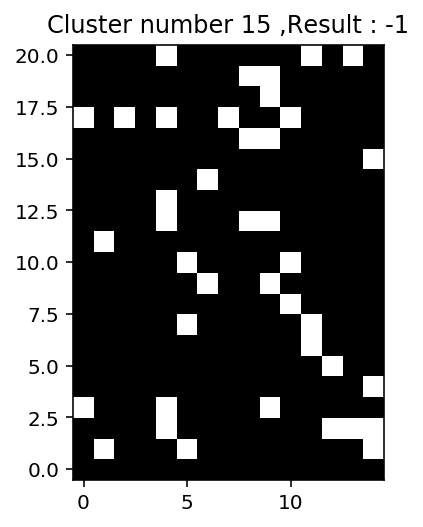

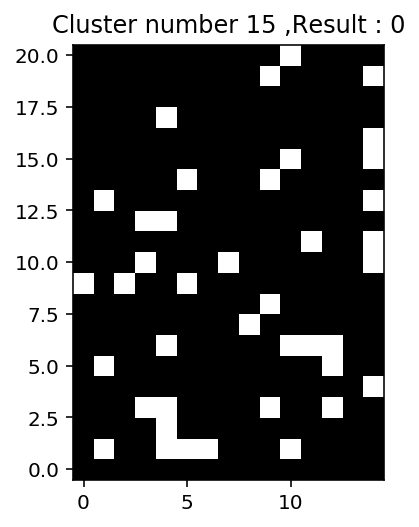

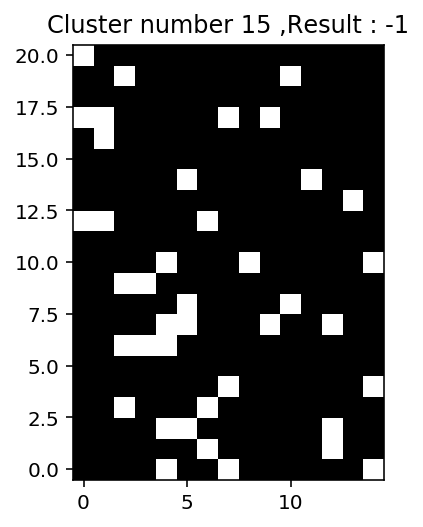

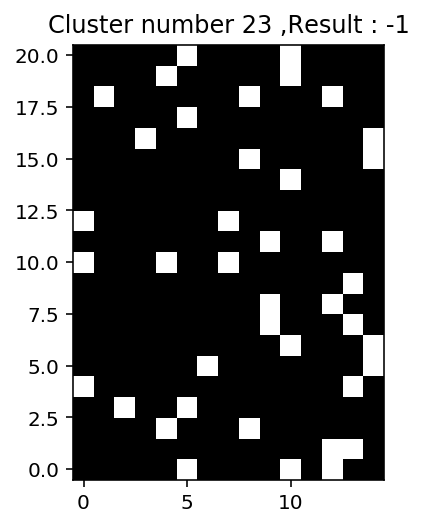

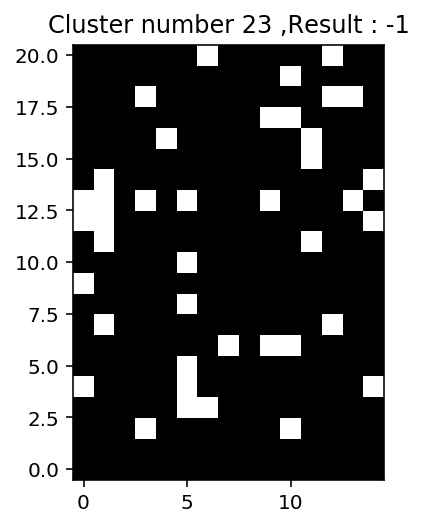

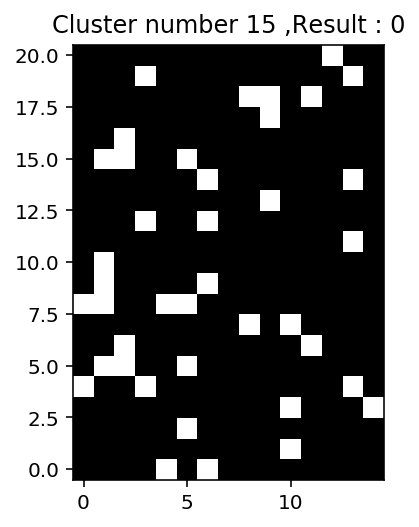

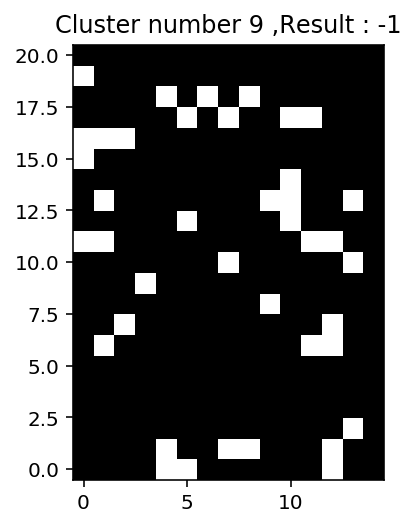

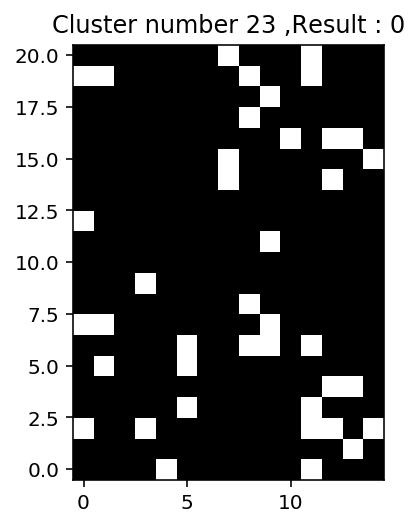

In [92]:
index = 0
for i in clusters:
    current_cluster = i['cluster_idx']
    features = x[index]
    if index < 200 and current_cluster == 9:
        plt.imshow(x[index].reshape(21, 15))
        plt.gray()
        plt.title('Cluster number 9 ,Result : %d' % y[index])
        plt.gca().invert_yaxis()
        plt.show()
    if index < 200 and current_cluster == 15:
        plt.imshow(x[index].reshape(21, 15))
        plt.gray()
        plt.title('Cluster number 15 ,Result : %d' % y[index])
        plt.gca().invert_yaxis()
        plt.show()
    if index < 200 and current_cluster == 23:
        plt.imshow(x[index].reshape(21, 15))
        plt.gray()
        plt.title('Cluster number 23 ,Result : %d' % y[index])
        plt.gca().invert_yaxis()
        plt.show()
    index = index + 1